R^2 score на тренировочных данных: 0.7749178425751908
R^2 score на тестовых данных: 0.7296738412715471


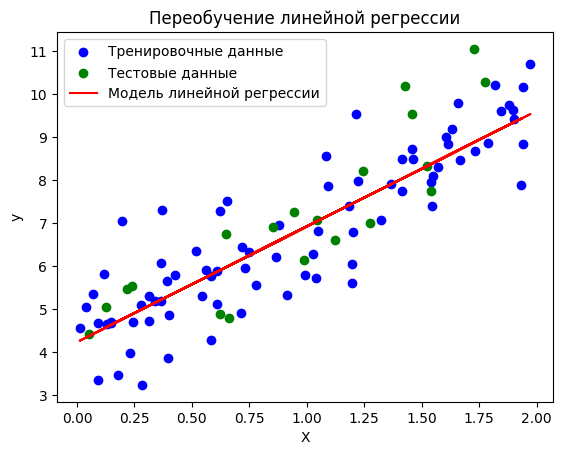

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Создаем синтетические данные
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + шум

# Разделяем данные на тренировочные и тестовые
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Обучаем линейную регрессию на тренировочных данных
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания на тренировочных и тестовых данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисляем R^2 score для оценки модели
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R^2 score на тренировочных данных: {r2_train}')
print(f'R^2 score на тестовых данных: {r2_test}')

# Визуализируем результаты
plt.scatter(X_train, y_train, color='blue', label='Тренировочные данные')
plt.scatter(X_test, y_test, color='green', label='Тестовые данные')
plt.plot(X, model.predict(X), color='red', label='Модель линейной регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Переобучение линейной регрессии')
plt.show()


R^2 score на тренировочных данных: 0.7970765567124771
R^2 score на тестовых данных: 0.7167717699534135


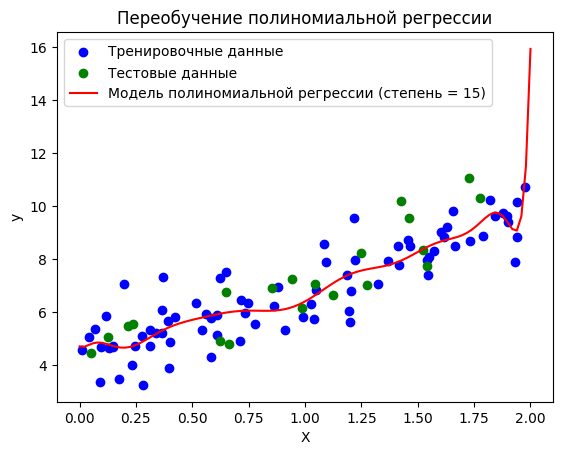

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Создаем синтетические данные
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + шум

# Разделяем данные на тренировочные и тестовые
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Преобразование данных для полиномиальной регрессии с высокой степенью
poly_features = PolynomialFeatures(degree=15)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Обучаем модель полиномиальной регрессии на тренировочных данных
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Делаем предсказания на тренировочных и тестовых данных
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Вычисляем R^2 score для оценки модели
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R^2 score на тренировочных данных: {r2_train}')
print(f'R^2 score на тестовых данных: {r2_test}')

# Визуализируем результаты
plt.scatter(X_train, y_train, color='blue', label='Тренировочные данные')
plt.scatter(X_test, y_test, color='green', label='Тестовые данные')

# Линия модели
X_fit = np.linspace(0, 2, 100).reshape(100, 1)
X_fit_poly = poly_features.transform(X_fit)
y_fit = model.predict(X_fit_poly)
plt.plot(X_fit, y_fit, color='red', label='Модель полиномиальной регрессии (степень = 15)')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Переобучение полиномиальной регрессии')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Создаем синтетические данные
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + шум

# Добавляем нерелевантные признаки
X_extra = np.random.rand(100, 20)  # 20 нерелевантных признаков
X_full = np.hstack([X, X_extra])

# Разделяем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Преобразование данных для полиномиальной регрессии с высокой степенью
poly_features = PolynomialFeatures(degree=15)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Обучаем Ridge регрессию на тренировочных данных
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

# Делаем предсказания на тренировочных и тестовых данных
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_test_pred_ridge = ridge_model.predict(X_test_poly)

# Вычисляем R^2 score для оценки модели
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f'R^2 score на тренировочных данных (Ridge): {r2_train_ridge}')
print(f'R^2 score на тестовых данных (Ridge): {r2_test_ridge}')

# Обучаем Lasso регрессию на тренировочных данных
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)

# Делаем предсказания на тренировочных и тестовых данных
y_train_pred_lasso = lasso_model.predict(X_train_poly)
y_test_pred_lasso = lasso_model.predict(X_test_poly)

# Вычисляем R^2 score для оценки модели
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f'R^2 score на тренировочных данных (Lasso): {r2_train_lasso}')
print(f'R^2 score на тестовых данных (Lasso): {r2_test_lasso}')

# Визуализируем результаты
plt.scatter(X[:, 0], y, color='blue', label='Данные')
plt.plot(X[:, 0], 4 + 3 * X[:, 0], color='green', label='Истинная зависимость')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Регуляризация Ridge и Lasso регрессии')
plt.show()